<a href="https://colab.research.google.com/github/apolloadeniran/Assignment/blob/main/Lateef_Adeniran_Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Select features and categories for practice

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Store features matrix in
data = pd.DataFrame(data= np.c_[iris['data']],
                    columns= iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
#store target vector in
target = pd.DataFrame(data= np.c_[iris['target']],
                      columns=['species'])
target.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([data, target], axis=1)
df = df.loc[df['species'].isin([1,2])]
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [ ]:
df1 =df.loc[:,['sepal length (cm)', 'petal length (cm)', 'species']]
df1.head()

,sepal length (cm),petal length (cm),species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


### Problem 2 Data Analysis

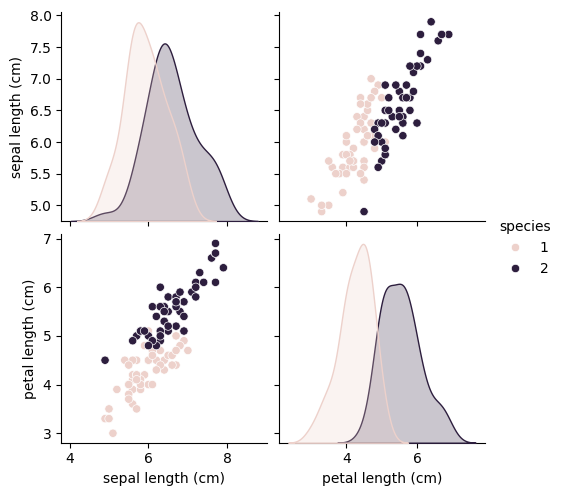

In [ ]:
sns.pairplot(df1, hue='species')

Other method

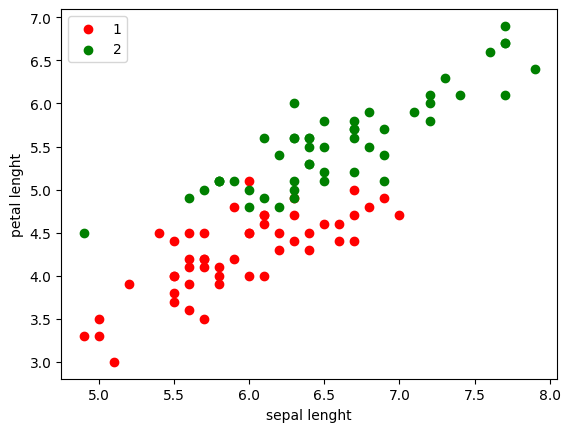

In [ ]:
colors = ['red' , 'green']
species = [1, 2]
for i in range(2):
    x = df1[df1['species'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=species[i])
plt.xlabel('sepal lenght')
plt.ylabel('petal lenght')
plt.legend()

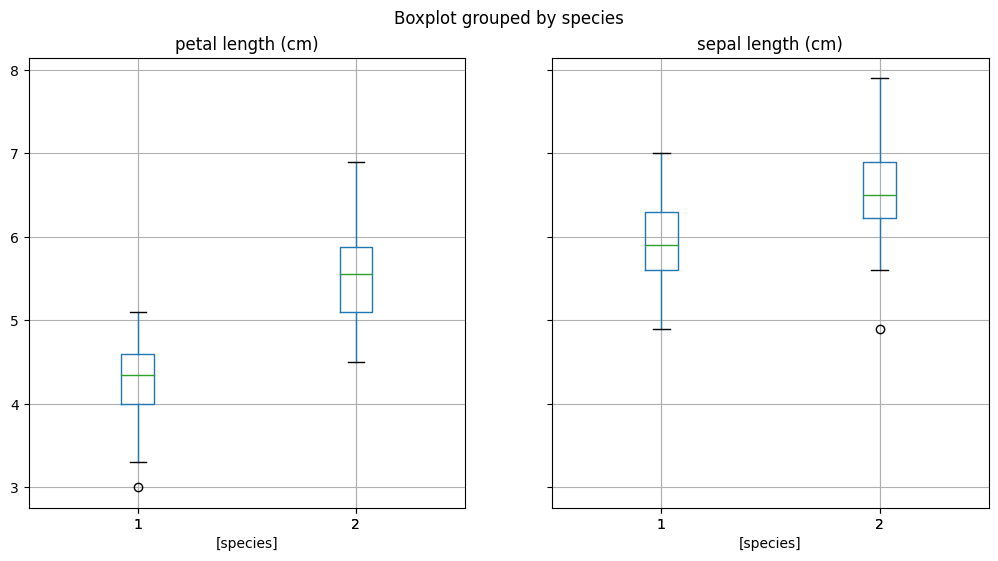

In [ ]:
df1.boxplot(by='species' , figsize=(12,6))
plt.show()

AttributeError: PolyCollection.set() got an unexpected keyword argument 'figsize'

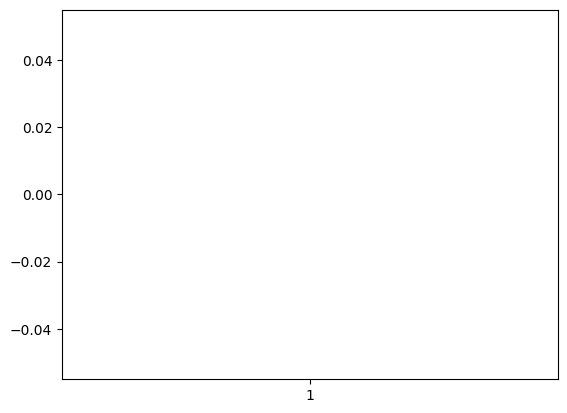

In [ ]:
sns.violinplot(x='species', y='petal length (cm)', data=df1, figsize=(12,6))


<Axes: xlabel='species', ylabel='sepal length (cm)'>

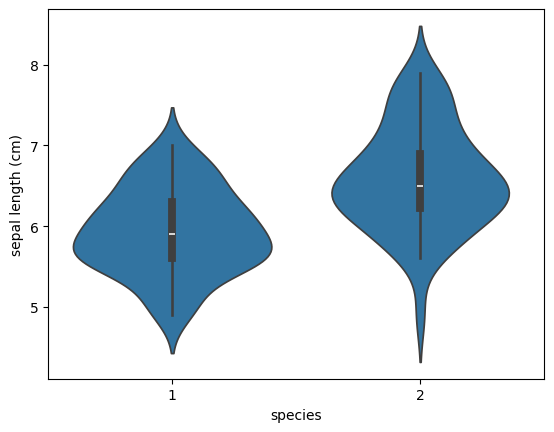

In [ ]:
sns.violinplot(x='species' , y='sepal length (cm)', data=df1)

In [ ]:
x = np.array(df1.loc[:, ['sepal length (cm)', 'petal length (cm)']])
x.shape

(100, 2)

In [ ]:
y=np.array(df1.loc[:, ['species']]).ravel()
y.ndim

1

###problem 3 Division of processing/training data and verification of data

Train Test Split
Data will be split into train and test sets

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#le = LabelEncorder()
#x = le.fit_transform(x)
#y = le.fit_transform(y)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [ ]:
x_train.shape

(75, 2)

In [ ]:
x_test.shape

(25, 2)

In [ ]:
y_train.ndim

1

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


[Problem 4] Pretreatment/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_trainTransform = scaler.transform(x_train)
x_testTransform = scaler.transform(x_test)

[Problem 5] Learning and estimation

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 5)
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(x_trainTransform, y_train)

# Predicting the Test set results
y_pred5 = classifier5.predict(x_testTransform)
print("pred5 = ", y_pred5)

# Instantiate learning model (k=1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(x_trainTransform, y_train)

# Predicting the Test set results
y_pred1 = classifier5.predict(x_testTransform)
print("pred5 = ", y_pred1)

# Instantiate learning model (k=3)
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(x_trainTransform, y_train)

# Predicting the Test set results
y_pred3 = classifier5.predict(x_testTransform)
print("pred5 = ", y_pred3)

pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


[Problem 6] Evaluation

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1, y_pred3]
keys = ["knn5", "knn1", "knn3"]

for a, prediction in enumerate(prediction, 0):
  print("prediction of = ", keys[a])
  print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
  print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
  print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
  print("Precision score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
  print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
  print('..................................................')

prediction of =  knn5
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precision score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
..................................................
prediction of =  knn1
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precision score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
..................................................
prediction of =  knn3
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precision score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
..................................................


**Recall** is a matric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.
**Acurracy** is the number of correctly predicted data points out of all the data points. Classification accuracy is our starting point. It is the number of correct predictions made divided by the prediction made, multiplied by 100 to turn it into a percentage.
**Precision** answers the question, out of the number of times a model predicted positive is very high and the importance of false positive, how often wat it correct? Precision should be used as a performarce metric when the importance of false negative is very low.
**F1 score** is used as a performance metric when the number of samples in the positive class is very less and if the cost of false-positive and the cost of false negative both are very high

[Problem 7] Visualization


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier3 = KNeighborsClassifier(n_neighbors=3)
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
  # setting
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  n_class = 2
  # pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(x[:,0])-0.5, np.max(x[:,0])+0.5, step), np.arange(np.min(x[:,1])-0.5, np.max(x[:,0])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  #plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
  for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='0')
  patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1):
  decision_region(x_testTransform, y_test, model)


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

[Problem 8] Learning by other methods


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier()
neig.fit(x_trainTransform, y_train)
y_predn = neig.predict(x_testTransform)

In [ ]:
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(x_trainTransform, y_train);
y_pred_lrc = lr_classifier.predict(x_testTransform)

In [ ]:
#Create a svm Classifier
clf = svm.SVC()
clf.fit(x_trainTransform, y_train)
y_pred_svm = clf.predict(x_test)

In [ ]:
# Decision Tree
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf.fit(x_trainTransform, y_train)
y_preddt = dt_clf.predict(x_testTransform)



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_trainTransform, y_train)
y_predrf = rf_clf.predict(x_testTransform)

Estimating, evaluation and visualization

In [ ]:
!pip install matplotlib-venn

In [ ]:
print("KNN")
print(y_predn)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predn)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predn, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predn, average=None))
print("Precision score = ", precision_score(y_true=y_test, y_pred=y_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predn))
# decision_region(x_testTransform, y_test, neigh)
print('\n')

print("LOGISTIC REFRESSION")
print(y_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_lrc)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_lrc))
print("decision_region(x_testTransform, y_test, lr_classifier)")
print('\n')

print ("svm")
print(y_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_svm)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_svm))
print("decision_region(x_testTransform, y_test, clf)")
print('\n')

print ("DECISION TREE")
print(y_preddt)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_preddt)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_preddt, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_preddt))
print("decision_region(x_testTransform, y_test, dt_clf)")
print('\n')

print ("RANDOM FOREST")
print(y_predrf)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predrf)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predrf, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predrf))
print("decision_region(x_testTransform, y_test, rf_clf)")

KNN
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precision score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


LOGISTIC REFRESSION
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]
decision_region(x_testTransform, y_test, lr_classifier)


svm
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy =  44.0
Recall =  [0. 1.]
F1 score =  [0.         0.61111111]
Precission score =  [0.   0.44]
Confusion =  [[ 0 14]
 [ 0 11]]
decision_region(x_testTransform, y_test, clf)


DECISION TREE
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
decision_region(x_t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Problem 9] (Advanced task) Comparison with and without standardization


In [ ]:
def comp_standard(title, prediction, model, std):
    print(title)
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred= prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred= prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred= prediction, average=None))
    print("Precission  score = ", precision_score(y_true=y_test, y_pred= prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred= prediction))
    decision_region(x_test, y_test, model)
model = [neig, lr_classifier, clf, dt_clf, rf_clf]

KNN
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission  score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


ValueError: Unrecognized marker style '0'

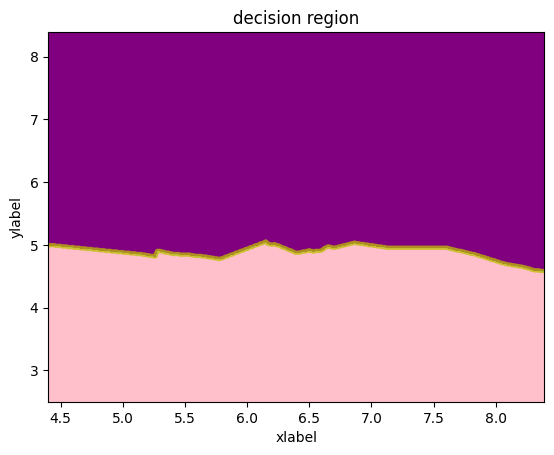

In [ ]:
#KNN
neig = KNeighborsClassifier()
neig.fit(x_train, y_train)
y_predn = neig.predict(x_test)
comp_standard('KNN', y_predn, neig, std=False)
print('..............................................................')
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train);
y_pred_lrc = lr_classifier.predict(x_test)
comp_standard('LOGISTIC REGRESSION', y_pred_lrc, lr_classifier, std=False)
print('..............................................................')
#Create a svm Classifier
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_svm = clf.predict(x_test)
comp_standard('SVM', y_pred_svm, clf, std=False)
print('..............................................................')
# Decision Tree
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf.fit(x_trainTransform, y_train)
y_preddt = dt_clf.predict(x_testTransform)
comp_standard('DECISION TREE', y_preddt, dt_clf, std=False)
print('..............................................................')
#Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
y_predrf = rf_clf.predict(x_test)
comp_standard('Random Forest', y_predrf, rf_clf, std=False)
print('..............................................................')


[Problem 10] (Advanced task) Method with high accuracy using all objective variables

In [ ]:
# New training set
X1 = np.array(data.loc[:,['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [ ]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# TRAIN TEST SPLIT
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [90]:
#KNN
kneig = KNeighborsClassifier(n_neighbors=3)
kneig.fit(X1_train, y1_train)
y1_predn = neig.predict(X1_test)

# LOGISTIC REGRESSION
lr_clf = LogisticRegression()
lr_clf.fit(X1_train, y1_train);
y1_pred_lrc = lr_clf.predict(X1_test)

#Create a svm Classifier
svm_clf = svm.SVC()
svm_clf.fit(X1_train, y1_train)
y1_pred_svm = clf.predict(X1_test)

# Decision Tree
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X1_train, y1_train)
y1_preddt = dtree_clf.predict(x_test)

#Random Forest
ranf_clf = RandomForestClassifier(random_state=0)
ranf_clf.fit(X1_train, y1_train)
y1_predrf = ranf_clf.predict(X1_test)

NameError: name 'X1_train' is not defined

In [ ]:
1

1

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
  # setting
  scatter_color = ['red', 'blue', 'green']
  contourf_color = ['pink', 'skyblue', 'purple']
  n_class = 3
  # pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(x[:,0])-0.5, np.max(x[:,0])+0.5, step), np.arange(np.min(x[:,1])-0.5, np.max(x[:,0])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  #plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
  for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='0')
  patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1):
  decision_region(x_testTransform, y_test, model)


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.